# Practical 5 Machine Learning

- Aayush Shah
- 19BCE245

### Importing Libraries

In [14]:
import numpy
from sklearn import datasets,metrics
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

### Loading data

In [15]:
# Loading data
X, y = load_iris(return_X_y=True)

X_train, y_train = X[0:150:2, ...], y[0:150:2]
X_test, y_test = X[1:150:2, ...], y[1:150:2]

### Gaussian NB model

In [16]:
gnb_model = GaussianNB()

In [17]:
gnb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_pred_gnb = gnb_model.predict(X_test)
confusion_matrix(y_test, y_pred_gnb)

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]])

In [19]:
accuracy_score(y_test, y_pred_gnb)

0.96

# Bernoulli naive bayes classification

In [20]:
Ber = BernoulliNB()
Ber.fit(X_train, y_train)
y_pred=Ber.predict(X_test)

print("Accuracy : ",metrics.accuracy_score(y_test,y_pred,normalize=True))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy :  0.3333333333333333
[[25  0  0]
 [25  0  0]
 [25  0  0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        25
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        25

    accuracy                           0.33        75
   macro avg       0.11      0.33      0.17        75
weighted avg       0.11      0.33      0.17        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

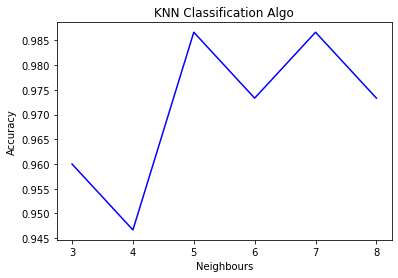

In [21]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
a,tempList1,tempList2=[],[],[]
b=[]
for i in range(3,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    a.append(knn.score(X_test, y_test))
    b.append(i)

plt.plot(b,a,color='b')
plt.xlabel("Neighbours")
plt.ylabel("Accuracy")
plt.title("KNN Classification Algo")
plt.show()

# Multinomial naive bayes classification

In [22]:
clf=MultinomialNB()
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(predictions.shape,predictions)

print("Accuracy: ",metrics.accuracy_score(y_test,predictions,normalize=True))
print(metrics.classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))

(75,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 2
 2]
Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.86      0.96      0.91        25
           2       0.95      0.84      0.89        25

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75

[[25  0  0]
 [ 0 24  1]
 [ 0  4 21]]


# part 2

All Electronic Customer Database Generation

In [10]:
 """
 there are basically 14 rows and 6 columns in this dataset
 column names are :   RID   age   income    student   credit_rating   class:buys_computer
 for age---> youth=1   middleaged=2 and senior=3
 for income---> low=1    medium=2 and high=3
 for student--->no=0 and yes=1
 for credit rating---> fair=0 and excellent=1
 for class---> no=0  and yes=1
 """
import pandas as pd
data=pd.read_csv('DataMining.csv',)
print(data)
data['Age'].replace('youth',1,inplace=True)
data['Age'].replace('middle_aged',2,inplace=True)
data['Age'].replace('senior',3,inplace=True)

data['Income'].replace('low',1,inplace=True)
data['Income'].replace('medium',2,inplace=True)
data['Income'].replace('high',3,inplace=True)

data['Student'].replace('no',0,inplace=True)
data['Student'].replace('yes',1,inplace=True)

data['Credit_Rating'].replace('fair',0,inplace=True)
data['Credit_Rating'].replace('excellent',1,inplace=True)

data['Class:Buy_Computer'].replace('no',0,inplace=True)
data['Class:Buy_Computer'].replace('yes',1,inplace=True)
print(data)
X_train=data.iloc[:14,1:5]
print(X_train)
y_train=data.iloc[:14,5]
print(y_train)

    RID          Age  Income Student Credit_Rating Class:Buy_Computer
0     1        youth    high      no          fair                 no
1     2        youth    high      no     excellent                 no
2     3  middle_aged    high      no          fair                yes
3     4       senior  medium      no          fair                yes
4     5       senior     low     yes          fair                yes
5     6       senior     low     yes     excellent                 no
6     7  middle_aged     low     yes     excellent                yes
7     8        youth  medium      no          fair                 no
8     9        youth     low     yes          fair                yes
9    10       senior  medium     yes          fair                yes
10   11        youth  medium     yes     excellent                yes
11   12  middle_aged  medium      no     excellent                yes
12   13  middle_aged    high     yes          fair                yes
13   14       senior

In [11]:
clf=GaussianNB()
clf.fit(X_train,y_train)
print(clf)
X_test=data.iloc[0:14,1:5]
print(X_train.shape,X_test.shape)
predictions=clf.predict(X_test)
print(X_test)
print(predictions.shape,predictions)
y_test=data.iloc[0:14,5]
print(y_test)
print("Accuracy: ",metrics.accuracy_score(y_test,predictions,normalize=True))
print("Classification Report: ",metrics.classification_report(y_test,predictions))
print("Confusion Matrix: ",metrics.confusion_matrix(y_test,predictions))

GaussianNB(priors=None, var_smoothing=1e-09)
(14, 4) (14, 4)
    Age  Income  Student  Credit_Rating
0     1       3        0              0
1     1       3        0              1
2     2       3        0              0
3     3       2        0              0
4     3       1        1              0
5     3       1        1              1
6     2       1        1              1
7     1       2        0              0
8     1       1        1              0
9     3       2        1              0
10    1       2        1              1
11    2       2        0              1
12    2       3        1              0
13    3       2        0              1
(14,) [0 0 0 1 1 1 1 0 1 1 1 0 1 0]
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Class:Buy_Computer, dtype: int64
Accuracy:  0.7857142857142857
Classification Report:                precision    recall  f1-score   support

           0       0.67      0.80      0.73

In [12]:
clf=BernoulliNB()
clf.fit(X_train,y_train)
print(clf)
X_test=data.iloc[0:14,1:5]
print(X_train.shape,X_test.shape)
predictions=clf.predict(X_test)
print(X_test)
print(predictions.shape,predictions)
y_test=data.iloc[0:14,5]
print(y_test)
print("Accuracy: ",metrics.accuracy_score(y_test,predictions,normalize=True))
print("Classification Report: ",metrics.classification_report(y_test,predictions))
print("Confusion Matrix: ",metrics.confusion_matrix(y_test,predictions))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
(14, 4) (14, 4)
    Age  Income  Student  Credit_Rating
0     1       3        0              0
1     1       3        0              1
2     2       3        0              0
3     3       2        0              0
4     3       1        1              0
5     3       1        1              1
6     2       1        1              1
7     1       2        0              0
8     1       1        1              0
9     3       2        1              0
10    1       2        1              1
11    2       2        0              1
12    2       3        1              0
13    3       2        0              1
(14,) [1 0 1 1 1 1 1 1 1 1 1 0 1 0]
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Class:Buy_Computer, dtype: int64
Accuracy:  0.7142857142857143
Classification Report:                precision    recall  f1-score   support

           0     

In [13]:
clf=MultinomialNB()
clf.fit(X_train,y_train)
print(clf)
X_test=data.iloc[0:14,1:5]
print(X_train.shape,X_test.shape)
predictions=clf.predict(X_test)
print(X_test)
print(predictions.shape,predictions)
y_test=data.iloc[0:14,5]
print(y_test)
print("Accuracy: ",metrics.accuracy_score(y_test,predictions,normalize=True))
print("Classification Report: ",metrics.classification_report(y_test,predictions))
print("Confusion Matrix: ",metrics.confusion_matrix(y_test,predictions))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
(14, 4) (14, 4)
    Age  Income  Student  Credit_Rating
0     1       3        0              0
1     1       3        0              1
2     2       3        0              0
3     3       2        0              0
4     3       1        1              0
5     3       1        1              1
6     2       1        1              1
7     1       2        0              0
8     1       1        1              0
9     3       2        1              0
10    1       2        1              1
11    2       2        0              1
12    2       3        1              0
13    3       2        0              1
(14,) [1 0 1 1 1 1 1 1 1 1 1 0 1 1]
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Class:Buy_Computer, dtype: int64
Accuracy:  0.6428571428571429
Classification Report:                precision    recall  f1-score   support

           0       0.50      